<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Loading the file with the csv module

sat_csv = "/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/sat_scores.csv"

with open(sat_csv, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
        
    # lists of dict values
    state = []
    rate = []
    verbal = []
    math = []
    
    # skipping column names
    next(csv_reader)

    # populating lists
    for line in csv_reader:
        state.append(line[0])
        rate.append(int(line[1]))
        verbal.append(int(line[2]))
        math.append(int(line[3]))

# building dict
sat_dict = {'state':state, 'rate':rate, 'verbal':verbal, 'math':math}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
print(sat_one[0])

NameError: name 'sat_one' is not defined

In [4]:
# Making a DataFrame with sat_dict
sat_dict_to_df = pd.DataFrame(sat_dict)

In [5]:
# Making a DataFrame with 
sat = pd.read_csv(sat_csv)
sat.columns = [col.lower() for col in sat.columns]

In [7]:
sat == sat_dict_to_df

,state,rate,verbal,math
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [8]:
sat.dtypes

state     object
rate       int64
verbal     int64
math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [9]:
# sat_dict_to_df's dtypes are the same as sat's, but only because I manually set them to be.
# Otherwise, sat_dict_to_df's column types would all be object/str.

sat_dict_to_df.dtypes

state     object
rate       int64
verbal     int64
math       int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
sat.head(10)

,state,rate,verbal,math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [11]:
sat.state.value_counts().size

52

Sat includes 52 rows, each with a unique state value. Given this, I assume that the other 3 columns are summary statisics for SATs in each state, with rate being participation rate (%) and verbal and math being the average score on the verbal and math components of the SATs per state (unclear if this is the mean or median).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
# not sure what rate is, could be pass rate, fail rate (makes sense with below graphs) or, 
# % of students in the state that took the test

sat_data_dictionary = {
    'state'  :"(str) The state which the scores come from, formatted as United States standard state codes.",
    'rate'   :"(int) The percentage of the state's eligible students who took the SAT test.",
    'verbal' :"(int) The state's average score on the SAT test's verbal component.",
    'math'   :"(int) The state's average score on the SAT test's math component.",
    'shape'  :sat.shape
}

sat_data_dictionary

{'state': '(str) The state which the scores come from, formatted as United States standard state codes.',
 'rate': "(int) The percentage of the state's eligible students who took the SAT test.",
 'verbal': "(int) The state's average score on the SAT test's verbal component.",
 'math': "(int) The state's average score on the SAT test's math component.",
 'shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

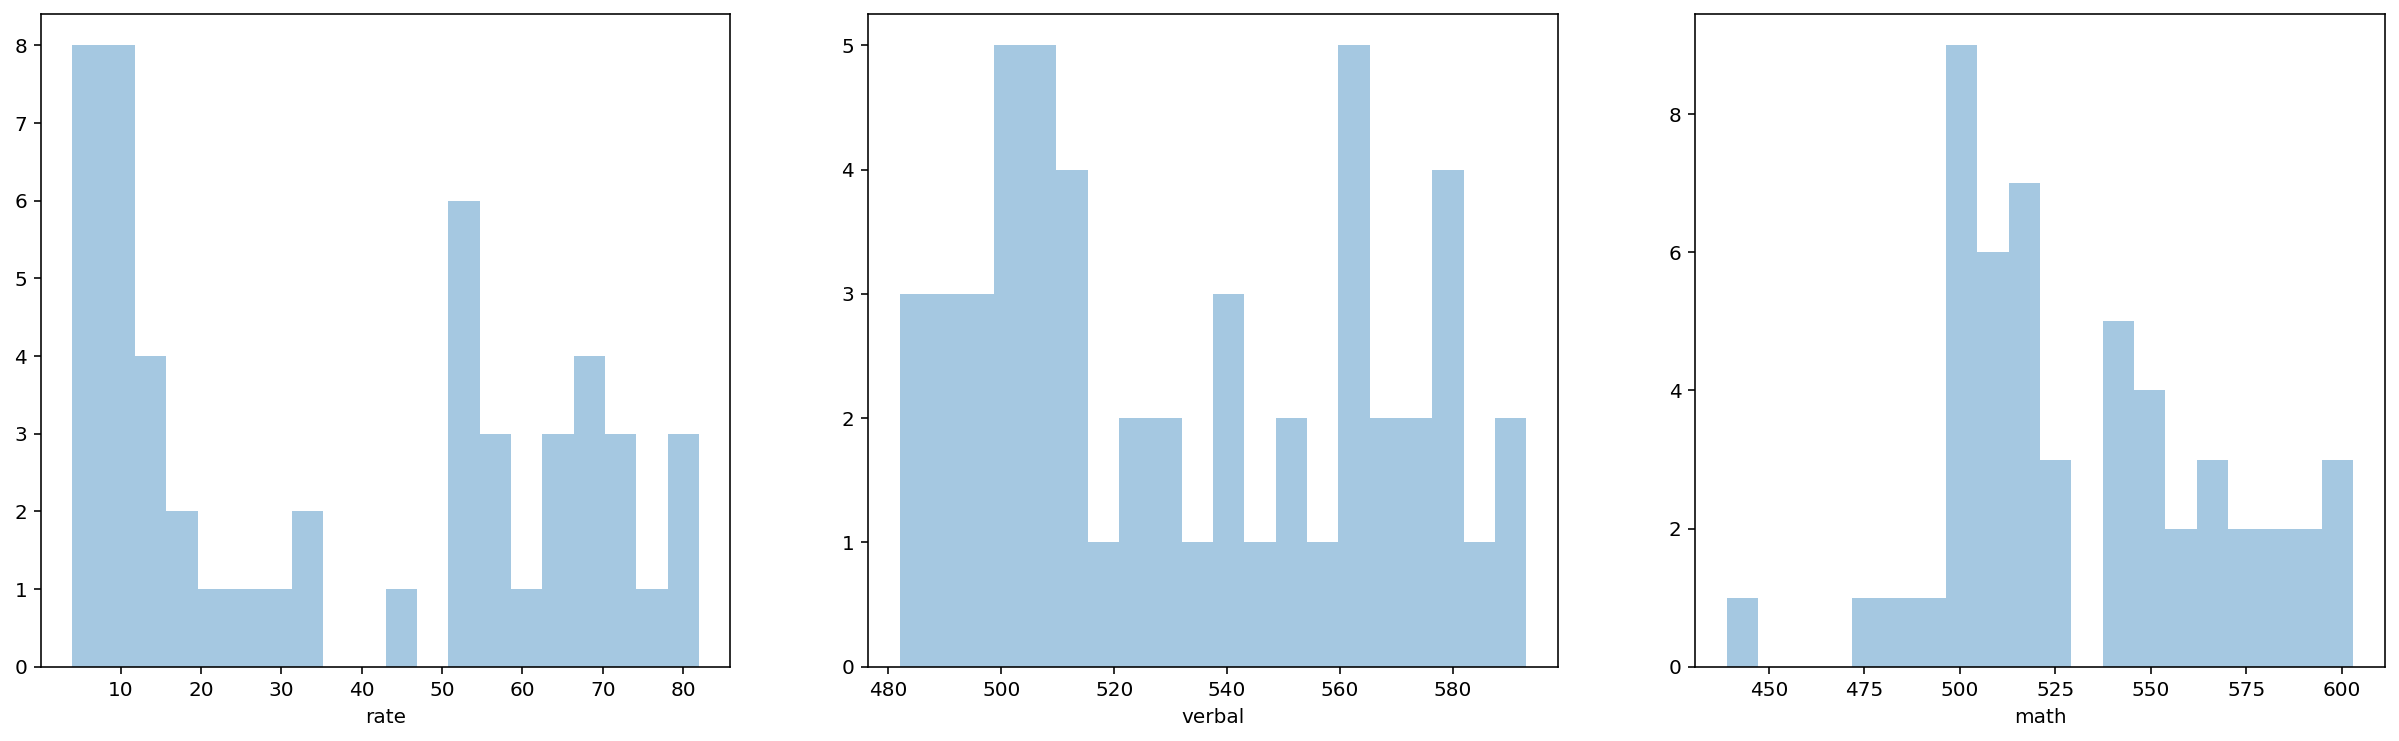

In [13]:
fig, ax = plt.subplots(1,3, figsize=[21,6])

plot_num = 0
for col in sat.columns[1:]:
    sns.distplot(sat[col],ax=ax[plot_num],bins=20,kde=False)
    plot_num +=1


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [16]:
census = pd.read_csv("/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/us census bureau regions and divisions.csv")

census.columns = ['state name', 'state', 'region', 'division']

sat = sat.merge(census,how='inner')

sat_data_dictionary['state name'] = "(str) The state's full name."
sat_data_dictionary['region'] = "(str) The region where the state is located."
sat_data_dictionary['division'] = "(str) The division where the state is located."

sat.head()

,state,rate,verbal,math,state name,region,division
0,CT,82,509,510,Connecticut,Northeast,New England
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic
2,MA,79,511,515,Massachusetts,Northeast,New England
3,NY,77,495,505,New York,Northeast,Middle Atlantic
4,NH,72,520,516,New Hampshire,Northeast,New England


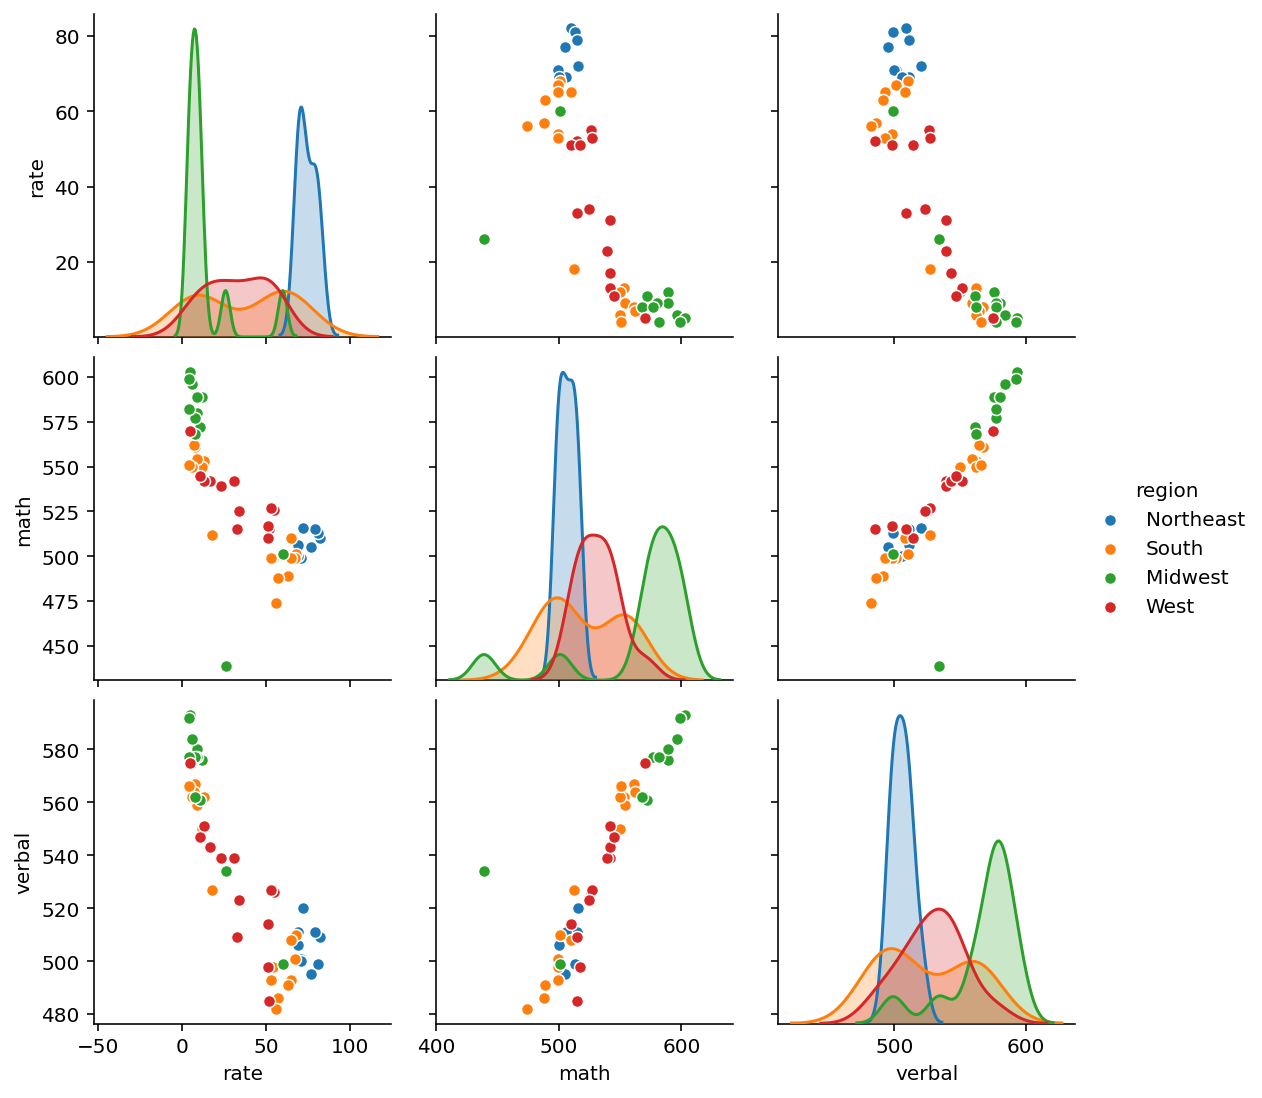

In [18]:
sns.pairplot(
    sat,
    vars = ['rate','math','verbal'],
    kind='scatter', 
    hue='region',
)



The pairplot shows:
    - Kernel density estimates for each region, for the 3 variables along the diagonal.
        - The rate KDE shows that in the Midwest, it is typical for few students to sit the SATs, whereas in the North East, it is common for most students to do so. The rate of students sitting the SATs varys widely amongst states in both the South and the West.
        - The math and verbal KDEs show that the average score on the math and verbal components of the SAT's is highest in the Midwest and lowest in the Northeast. Whilst the distribution of scores for the Northeast is fairly

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

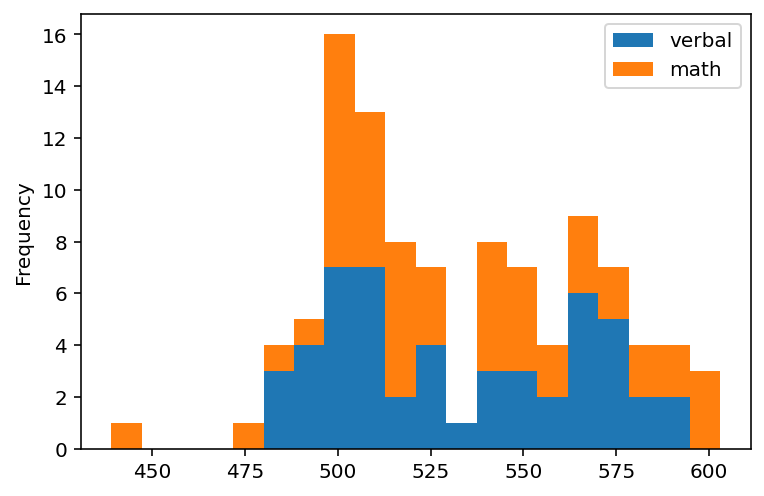

In [19]:
sat[['verbal','math']].plot(kind='hist', bins=20, stacked =True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

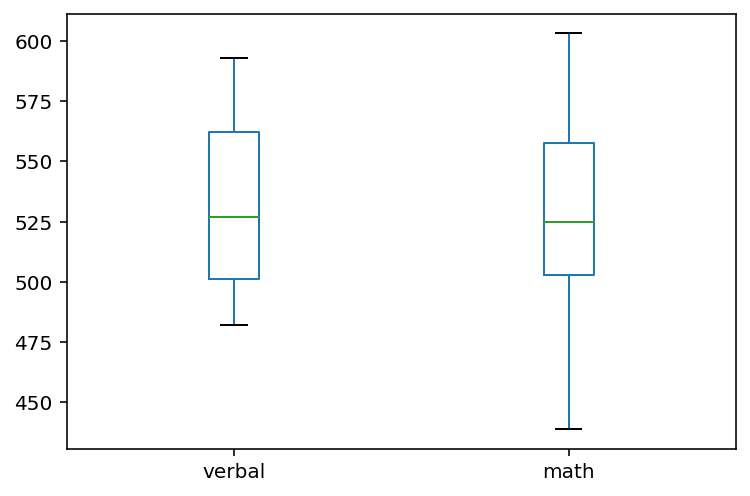

In [20]:
sat[['verbal','math']].plot(kind='box')

Q: What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

A: Both histograms and box plots show the distribution of the dataset. The advantage of a box plot is that is also 
shows the quartiles of the dataset and any outliers (defined as values beyond 1.5 x IQR or -1.5 x IQR.

Q: What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

A: Rate shouldn't be plotted on the same box-plot as math and verbal, it is on a differnet scale and will 
be difficult to interpret. Specifically, values for rate have the potential to range between 0-100 (as it 
is a percentage), whereas SAT component scores (i.e. math and verbal) have the potential to range between 
200-800. The ranges of the actual values in the data set are smaller.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


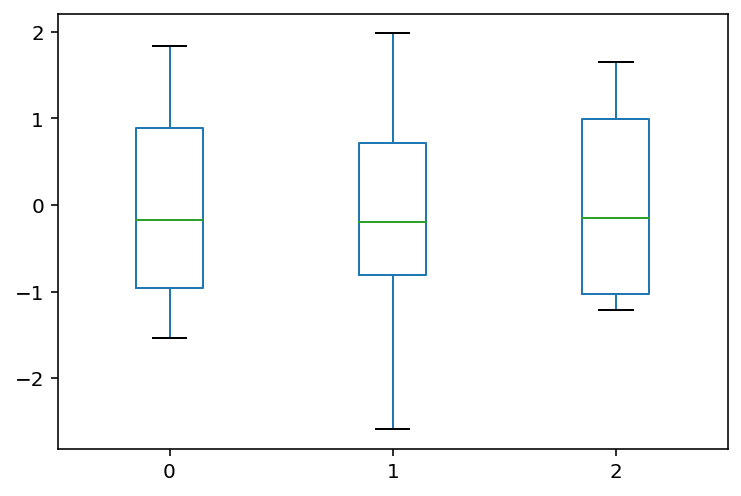

In [21]:
pd.DataFrame(stats.zscore(sat[['verbal','math','rate']])).plot(kind='box')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
print(f"There are {len(sat[sat.verbal > np.mean(sat.verbal)])} states with verbal scores above the mean ({round(np.mean(sat.verbal),2)}).")
verbal_above_mean = sat[sat.verbal > np.mean(sat.verbal)]
verbal_above_mean.head()

There are 24 states with verbal scores above the mean (532.53).


,state,rate,verbal,math,state name,region,division
26,CO,31,539,542,Colorado,West,Mountain
27,OH,26,534,439,Ohio,Midwest,East North Central
28,MT,23,539,539,Montana,West,Mountain
30,ID,17,543,542,Idaho,West,Mountain
31,TN,13,562,553,Tennessee,South,East South Central


Fewer than half the states have a verbal score above the mean. This indicates that the data are right/positively skewed (if only mildly)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
print(f"There are {len(sat[sat.verbal > np.median(sat.verbal)])} states with verbal scores above the median ({np.median(sat.verbal)}).")
verbal_above_median = sat[sat.verbal > np.median(sat.verbal)]
verbal_above_median.head()

There are 24 states with verbal scores above the median (527.0).


,state,rate,verbal,math,state name,region,division
26,CO,31,539,542,Colorado,West,Mountain
27,OH,26,534,439,Ohio,Midwest,East North Central
28,MT,23,539,539,Montana,West,Mountain
30,ID,17,543,542,Idaho,West,Mountain
31,TN,13,562,553,Tennessee,South,East South Central


This list is identical to the previous list. This is because 24 verbal scores are above the median, 2 sit on the median and 25 are below the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
sat['verbal_math_diff'] = sat['verbal'].subtract(sat['math'])
sat.head()

,state,rate,verbal,math,state name,region,division,verbal_math_diff
0,CT,82,509,510,Connecticut,Northeast,New England,-1
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14
2,MA,79,511,515,Massachusetts,Northeast,New England,-4
3,NY,77,495,505,New York,Northeast,Middle Atlantic,-10
4,NH,72,520,516,New Hampshire,Northeast,New England,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
# 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math
sat[sat['verbal'] > sat['math']].sort_values('verbal_math_diff', ascending = False).head(10)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
27,OH,26,534,439,Ohio,Midwest,East North Central,95
29,WV,18,527,512,West Virginia,South,South Atlantic,15
50,MS,4,566,551,Mississippi,South,East South Central,15
45,AR,6,562,550,Arkansas,South,West South Central,12
31,TN,13,562,553,Tennessee,South,East South Central,9
9,VA,68,510,501,Virginia,South,South Atlantic,9
32,NM,13,551,542,New Mexico,West,Mountain,9
16,DC,56,482,474,District of Columbia,South,South Atlantic,8
41,OK,8,567,561,Oklahoma,South,West South Central,6
8,ME,69,506,500,Maine,Northeast,New England,6


In [27]:
# states with the greatest gap between Verbal and Math such that Math is greater than Verbal
sat[sat['verbal'] < sat['math']].sort_values('verbal_math_diff').head(10)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
21,HI,52,485,515,Hawaii,West,Pacific,-30
23,CA,51,498,517,California,West,Pacific,-19
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14
33,IL,12,576,589,Illinois,Midwest,East North Central,-13
44,WI,6,584,596,Wisconsin,Midwest,East North Central,-12
36,MI,11,561,572,Michigan,Midwest,East North Central,-11
47,IA,5,593,603,Iowa,Midwest,West North Central,-10
3,NY,77,495,505,New York,Northeast,Middle Atlantic,-10
37,MN,9,580,589,Minnesota,Midwest,West North Central,-9
49,ND,4,592,599,North Dakota,Midwest,West North Central,-7


In [28]:
# Print the header of both variables, only showing the top 3 states in each.
sat[sat['verbal'] > sat['math']].sort_values('verbal_math_diff', ascending = False).head(3)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
27,OH,26,534,439,Ohio,Midwest,East North Central,95
29,WV,18,527,512,West Virginia,South,South Atlantic,15
50,MS,4,566,551,Mississippi,South,East South Central,15


In [29]:
# Print the header of both variables, only showing the top 3 states in each.
sat[sat['verbal'] < sat['math']].sort_values('verbal_math_diff').head(3)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
21,HI,52,485,515,Hawaii,West,Pacific,-30
23,CA,51,498,517,California,West,Pacific,-19
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


,rate,verbal,math,verbal_math_diff
rate,1.000000,-0.888121,-0.773419,-0.098671
verbal,-0.888121,1.000000,0.899909,0.044527
math,-0.773419,0.899909,1.000000,-0.395574
verbal_math_diff,-0.098671,0.044527,-0.395574,1.000000


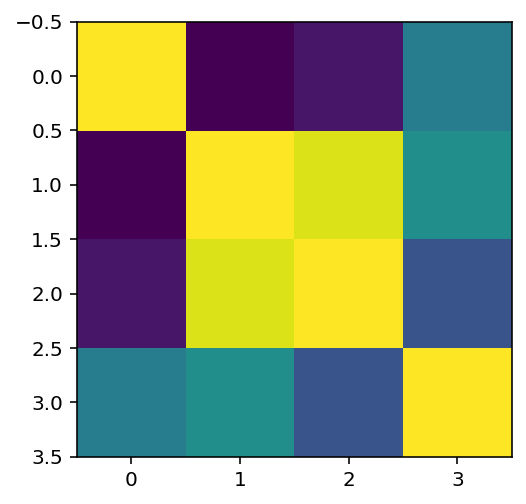

In [32]:
sat.corr()
plt.imshow(sat.corr())

The upper left/bottom right diagonal tell us nothing (each feature correlates perfectly with itself). 

Both verbal and math have a strong negative correlation with rate, suggesting that, in states with a low participation rate, only the students who are likely to attain high SAT scores participate. 

There is a strong positive correlation between math and verbal, indicating that states that have a high verbal score, typically also have a high math score (and vice versa).

The moderate negative correlation between math and verbal_math_diff and negliable positive correlation between verbal and verbal_math_diff indicates that states that the difference between the math and verbal scores for states perform better at math tend to be greater than the difference for states that perfom better on the verbal assesments.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [33]:
sat.describe()

,rate,verbal,math,verbal_math_diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [35]:
sat.cov()

,rate,verbal,math,verbal_math_diff
rate,759.04,-816.280000,-773.220000,-43.060000
verbal,-816.28,1112.934118,1089.404706,23.529412
math,-773.22,1089.404706,1316.774902,-227.370196
verbal_math_diff,-43.06,23.529412,-227.370196,250.899608


Q: Describe how the covariance matrix is different from the correlation matrix.
    
A: Correlation measures the degree of linear relationship between two variables.
    
Q: What is the process to convert the covariance into the correlation?

A:
    
Q: Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
    
A: standardisaton

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [36]:
drugs = pd.read_csv('/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/drug-use-by-age.csv')

In [42]:
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Q: Are there outliers in the dataset? 

A:

Q: Define, in words, how you numerically define outliers.

A: Outliers are typically defined as values which deviate from a meaure of the dataset's central tendancy by some particular margin. For instance, this could be values more than 3 standard deviations from the mean, or values beyond 1.5 x IQR or - 1.5 x IQR

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.